In [11]:
%%capture
import operator

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import importlib as imp

from collections import namedtuple
from random import sample, shuffle
from functools import reduce
from itertools import accumulate
from math import floor, ceil, sqrt, log, pi
from matplotlib import pyplot as plt
from tensorflow.keras import layers, utils, losses, models as mds, optimizers
from IPython.display import display

if imp.util.find_spec('aggdraw'): import aggdraw
if imp.util.find_spec('tensorflow_addons'): from tensorflow_addons import layers as tfa_layers
if imp.util.find_spec('tensorflow_models'): from official.vision.beta.ops import augment as visaugment
if imp.util.find_spec('tensorflow_probability'): from tensorflow_probability import distributions as tfd
if imp.util.find_spec('keras_tuner'): import keras_tuner as kt

In [3]:
# Dataset image size
IMG_SIZE = 264
N_CLASSES = 102

def preprocess(image, *args):
    image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
    image /= 255
    return (image, *args)

train_ds, val_ds = tfds.load(
    'oxford_flowers102',
    split=['train', 'validation'],
    as_supervised=True,
    read_config=tfds.ReadConfig(try_autocache=False)
)

train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

2022-04-19 14:04:12.270993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/broxoli/miniconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-04-19 14:04:12.271132: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-19 14:04:12.271224: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-19319V3): /proc/driver/nvidia/version does not exist
2022-04-19 14:04:12.274103: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
T_SAMPLES_PER_CLASS = 3
V_SAMPLES_PER_CLASS = 3

def make_dataset_samples(ds, n_samples_per_class):
    samples = list(map(lambda _: [], range(N_CLASSES)))
    total_samples = 0
    for image,label in ds:
        if len(samples[label]) < n_samples_per_class:
            samples[label].append(image)
            total_samples += 1
        
        if total_samples >= n_samples_per_class*N_CLASSES:
            break
    return samples

def show_samples(samples, samples_per_class, title='Samples', classes=list(range(N_CLASSES))):
    n_classes = len(classes)
    fig, axes = plt.subplots(n_classes, samples_per_class, figsize=(samples_per_class*3, n_classes*2))

    for rowid,row in enumerate(classes):
        for col in range(samples_per_class):
            axes[rowid, col].imshow(samples[row][col])
            axes[rowid, col].axis('off')
            axes[rowid, col].set_title('C ' + str(row))
    
    plt.tight_layout()
    fig.suptitle(title, fontsize=16)
    
    return fig

T_SAMPLES = make_dataset_samples(train_ds, T_SAMPLES_PER_CLASS)
V_SAMPLES = make_dataset_samples(val_ds, V_SAMPLES_PER_CLASS)

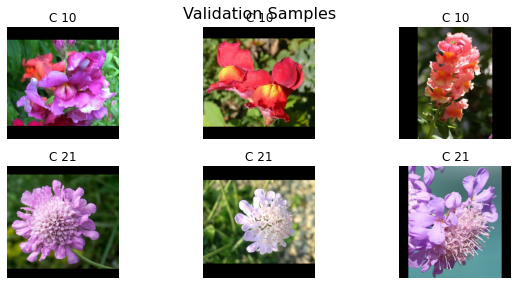

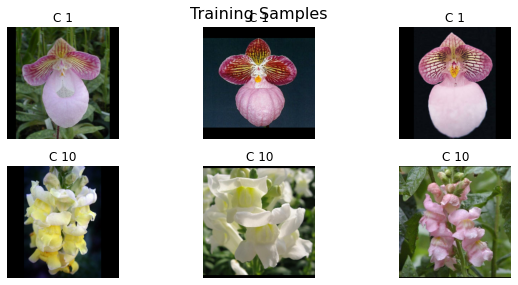

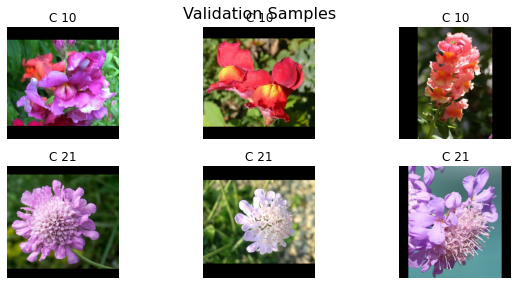

In [18]:
show_samples(T_SAMPLES, T_SAMPLES_PER_CLASS, 'Training Samples', classes=[1, 10])
show_samples(V_SAMPLES, V_SAMPLES_PER_CLASS, 'Validation Samples', classes=[10, 21])

In [13]:
def show_samples(samples, samples_per_class, title='Samples', classes=list(range(N_CLASSES))):
    n_classes = len(classes)
    fig, axes = plt.subplots(n_classes, samples_per_class, figsize=(samples_per_class*3, n_classes*2))

    for rowid,row in enumerate(classes):
        for col in range(samples_per_class):
            axes[rowid, col].imshow(samples[row][col])
            axes[rowid, col].axis('off')
            axes[rowid, col].set_title('C ' + str(row))
    
    plt.tight_layout()
    fig.suptitle(title, fontsize=16)
    
    return fig
